###                            CO3093/CO7093 - Big Data & Predictive Analytics
###                                       Classification & Clustering

In [1]:
#Importing the necessary packages and ignoring warnings
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Defining the folder path
os.chdir("G:\\UOL\\Big Data & Predictive Analytics\\Assignment")

In [3]:
#Reading CSV file
df=pd.read_csv("oscars-demographics.csv",sep=",", header=0,encoding='ANSI',na_values=['Na'])
display(df.head())

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,02/10/2015 03:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,02/10/2015 02:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,02/10/2015 02:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,02/10/2015 02:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,02/10/2015 01:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [4]:
print ("Total " + str(df.shape[0]) + " Rows & "+ str(df.shape[1]) + " Columns in given Oscars Demographics dataset")

Total 441 Rows & 27 Columns in given Oscars Demographics dataset


In [5]:
# gives us statistical info about the numerical variables.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_unit_id,441.0,6.704825e+08,113997.448065,6.704544e+08,670454463.0,670454573.0,670454683.0,670972898.0
_trusted_judgments,441.0,7.637188e+00,19.015541,3.000000e+00,3.0,3.0,3.0,95.0
birthplace:confidence,441.0,9.952594e-01,0.038917,6.571000e-01,1.0,1.0,1.0,1.0
date_of_birth:confidence,441.0,9.966066e-01,0.032060,6.562000e-01,1.0,1.0,1.0,1.0
race_ethnicity:confidence,441.0,9.991304e-01,0.016438,6.571000e-01,1.0,1.0,1.0,1.0
religion:confidence,441.0,9.893732e-01,0.065610,3.333000e-01,1.0,1.0,1.0,1.0
sexual_orientation:confidence,441.0,9.923905e-01,0.049458,6.571000e-01,1.0,1.0,1.0,1.0
year_of_award,441.0,1.973166e+03,24.030895,1.927000e+03,1953.0,1973.0,1994.0,2014.0
year_of_award:confidence,441.0,9.900821e-01,0.059177,3.333000e-01,1.0,1.0,1.0,1.0
year_of_award_gold,11.0,1.977364e+03,21.592928,1.942000e+03,1964.0,1977.0,1997.0,2006.0


In [6]:
## Gives us information about the features. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     439 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       172 non-null    object 
 12  religion:confidence            441 non-null    flo

In [7]:
## Gives us the count of different types of objects.
df.dtypes.value_counts()

object     16
float64     7
int64       3
bool        1
dtype: int64

Most of the columns are Object and Float data type

In [8]:
temp = pd.DataFrame(df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])
print(temp)

                         Total_missing
race_ethnicity_gold                439
sexual_orientation_gold            438
religion_gold                      434
date_of_birth_gold                 433
birthplace_gold                    432
year_of_award_gold                 430
religion                           269
_last_judgment_at                   25
sexual_orientation                  11
birthplace                           2


There are lot a missing values in Columns with *_gold, Hence removing the insignificant features and features with more null values

In [9]:
#As per the given problem statement considering the subset of the dataframe formed by the following columns: 
#cols = [’birthplace’, ’date_of_birth’,’race_ethnicity’, ’year_of_award’, ’award’]

df1=df[['birthplace','date_of_birth','race_ethnicity','sexual_orientation','year_of_award','award']]
df1.head(3)

,birthplace,date_of_birth,race_ethnicity,sexual_orientation,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,Straight,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,Straight,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,Straight,1931,Best Director


In [10]:
df1

,birthplace,date_of_birth,race_ethnicity,sexual_orientation,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,Straight,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,Straight,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,Straight,1931,Best Director
3,"Chicago, Il",23-Feb-1899,White,Straight,1932,Best Director
4,"Salt Lake City, Ut",23-Apr-1894,White,Straight,1933,Best Director
5,"Glasgow, Scotland",2-Feb-1886,White,Straight,1934,Best Director
6,"Bisacquino, Sicily, Italy",18-May-1897,White,Straight,1935,Best Director
7,"Cape Elizabeth, Me",1-Feb-1894,White,Bisexual,1936,Best Director
8,"Bisacquino, Sicily, Italy",18-May-1897,White,Straight,1937,Best Director
9,"Los Angeles, Ca",3-Oct-1898,White,Straight,1938,Best Director


In [11]:
#Columns with Null values
temp = pd.DataFrame(df1.isnull().sum()[df1.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])
temp['percentage']=temp['Total_missing']/df1.shape[0]
print(temp)

                    Total_missing  percentage
sexual_orientation             11    0.024943
birthplace                      2    0.004535


In [12]:
print(type(df1))
index=df1.columns.tolist()
print(index)

<class 'pandas.core.frame.DataFrame'>
['birthplace', 'date_of_birth', 'race_ethnicity', 'sexual_orientation', 'year_of_award', 'award']


In [13]:
df1.describe(include=['object']).T

,count,unique,top,freq
birthplace,439,232,New York City,35
date_of_birth,441,346,30-Jul-74,4
race_ethnicity,441,6,White,411
sexual_orientation,430,5,Straight,397
award,441,5,Best Actress,95


In [14]:
#Unique Values for each Column
for x in index:
    print('  ')
    print('Column Name : '+x)
    y=str(len(df[x].unique().tolist()))
    print('-------------------------------------')
    print('Unique Values : '+y)
    print('  ')
    print(df[x].unique().tolist())
    print('  ')
    print('-------------------------------------')

  
Column Name : birthplace
-------------------------------------
Unique Values : 233
  
['Chisinau, Moldova', 'Glasgow, Scotland', 'Chicago, Il', 'Salt Lake City, Ut', 'Bisacquino, Sicily, Italy', 'Cape Elizabeth, Me', 'Los Angeles, Ca', 'Pasadena, Ca', 'Mulhouse, Haut-Rhin, Alsace, France', 'Budapest, Hungary', 'New York City', 'Sucha, Galicia, Austria', 'Istanbul, Turkey', 'Nevada, Mo', 'Wilkes-Barre, Pa', 'Oakland, Ca', 'Vienna, Austria', 'Lawrence, Ks', 'Croydon, Surrey, England', 'Winchester, In', 'Shipley, Yorkshire, England', 'Berlin, Germany', 'St. Louis Park, Mn', 'London, England', 'Tokyo, Japan', 'Minneapolis, Mn', 'Detroit, Mi', 'C’\x8dslav, Czechoslovakia', 'Oak Park, Il', 'Brooklyn, Ny', 'Waxahachie, Tx', 'Santa Monica, Ca', 'Richmond, Va', 'Cambridge, England', 'North Bergen, Nj', 'Lafayette, In', 'Parma, Emilia-Romagna, Italy', 'Baltimore, Md', 'Lynwood, Ca', 'Baldwin, Ny', 'San Francisco, Ca', 'Cincinnati, Oh', 'Peekskill, Ny', 'Ryde, Isle of Wight, England', 'Kapuska

In [15]:
#Unique values in Lob
date=df1.date_of_birth
df1["ldob"]= date.str.len()
df1["ldob"].unique().tolist()

[11, 10, 9, 15, 4]

In [16]:
#Cleansing the date_of_birth column

df1['date_of_birth'] = df1['date_of_birth'].apply(lambda x: (x.replace(r'[1]','')))
df1['date_of_birth'] = df1['date_of_birth'].apply(lambda x: (x.replace(" ","")))
df1['DOB_parsed_yy']=pd.to_datetime(df1['date_of_birth'],format="%d-%b-%y",errors='coerce')
df1.loc[df1['DOB_parsed_yy'].dt.year >= 2000, 'DOB_parsed_yy'] -= pd.DateOffset(years=100)
df1['DOB_parsed_YYYY']=pd.to_datetime(df1['date_of_birth'],format="%d-%b-%Y",errors='coerce').fillna(pd.to_datetime(df1['date_of_birth'], format="%Y", errors="coerce"))
df1['DOB']=df1['DOB_parsed_yy'].combine_first(df1['DOB_parsed_YYYY'])
df1['year'] = pd.to_datetime(df1['DOB'], errors='coerce').dt.year
print(df1['year'].astype(int))

0      1895
1      1886
2      1895
3      1899
4      1894
5      1886
6      1897
7      1894
8      1897
9      1898
10     1897
11     1883
12     1894
13     1894
14     1902
15     1886
16     1898
17     1918
18     1906
19     1902
20     1909
21     1906
22     1909
23     1909
24     1904
25     1894
26     1907
27     1909
28     1920
29     1904
30     1908
31     1903
32     1902
33     1906
34     1914
35     1908
36     1928
37     1899
38     1914
39     1907
40     1931
41     1954
42     1906
43     1926
44     1920
45     1935
46     1927
47     1921
48     1939
49     1932
50     1935
51     1935
52     1939
53     1932
54     1936
55     1937
56     1923
57     1940
58     1932
59     1934
60     1946
61     1941
62     1942
63     1946
64     1955
65     1944
66     1930
67     1946
68     1952
69     1956
70     1954
71     1954
72     1946
73     1965
74     1963
75     1954
76     1933
77     1961
78     1930
79     1954
80     1942
81     1957
82     1956
83  

In [17]:
#Extracting the age from year_of_award and birth year
df1['award_age'] = (df1['year_of_award']) - (df1['year'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   birthplace          439 non-null    object        
 1   date_of_birth       441 non-null    object        
 2   race_ethnicity      441 non-null    object        
 3   sexual_orientation  430 non-null    object        
 4   year_of_award       441 non-null    int64         
 5   award               441 non-null    object        
 6   ldob                441 non-null    int64         
 7   DOB_parsed_yy       385 non-null    datetime64[ns]
 8   DOB_parsed_YYYY     56 non-null     datetime64[ns]
 9   DOB                 441 non-null    datetime64[ns]
 10  year                441 non-null    int64         
 11  award_age           441 non-null    int64         
dtypes: datetime64[ns](3), int64(4), object(5)
memory usage: 41.5+ KB


Extracting only necesary columns, eliminating birthdate and year of award as they may exhibit collinearity with award_age

In [19]:
df1=df1[['race_ethnicity','award','sexual_orientation','birthplace','award_age']]

In [20]:
df1

,race_ethnicity,award,sexual_orientation,birthplace,award_age
0,White,Best Director,Straight,"Chisinau, Moldova",32
1,White,Best Director,Straight,"Glasgow, Scotland",44
2,White,Best Director,Straight,"Chisinau, Moldova",36
3,White,Best Director,Straight,"Chicago, Il",33
4,White,Best Director,Straight,"Salt Lake City, Ut",39
5,White,Best Director,Straight,"Glasgow, Scotland",48
6,White,Best Director,Straight,"Bisacquino, Sicily, Italy",38
7,White,Best Director,Bisexual,"Cape Elizabeth, Me",42
8,White,Best Director,Straight,"Bisacquino, Sicily, Italy",40
9,White,Best Director,Straight,"Los Angeles, Ca",40


In [21]:
duplicateRowsDF = df1[df1.duplicated()]
print(len(duplicateRowsDF.sort_values('birthplace')))
print(duplicateRowsDF)

27
    race_ethnicity                    award sexual_orientation  \
63           White            Best Director           Straight   
220          White    Best Supporting Actor           Straight   
416          White            Best Director           Straight   
417          White             Best Actress           Straight   
418          White               Best Actor           Straight   
419          White            Best Director           Straight   
420          White  Best Supporting Actress           Straight   
421          White  Best Supporting Actress           Bisexual   
422          White  Best Supporting Actress           Straight   
423          White  Best Supporting Actress           Straight   
424          White             Best Actress           Straight   
425          White    Best Supporting Actor           Straight   
426          White             Best Actress           Straight   
427          White               Best Actor           Straight   
428    

In [22]:
# Temp data frame with split value columns 
new = df1["birthplace"].str.split(", ", n = 1, expand = True) 
new[1]=new[1].str.split(", ").str[-1]
df1["City"]= new[0]
df1["Country"]= new[1] 
df1

,race_ethnicity,award,sexual_orientation,birthplace,award_age,City,Country
0,White,Best Director,Straight,"Chisinau, Moldova",32,Chisinau,Moldova
1,White,Best Director,Straight,"Glasgow, Scotland",44,Glasgow,Scotland
2,White,Best Director,Straight,"Chisinau, Moldova",36,Chisinau,Moldova
3,White,Best Director,Straight,"Chicago, Il",33,Chicago,Il
4,White,Best Director,Straight,"Salt Lake City, Ut",39,Salt Lake City,Ut
5,White,Best Director,Straight,"Glasgow, Scotland",48,Glasgow,Scotland
6,White,Best Director,Straight,"Bisacquino, Sicily, Italy",38,Bisacquino,Italy
7,White,Best Director,Bisexual,"Cape Elizabeth, Me",42,Cape Elizabeth,Me
8,White,Best Director,Straight,"Bisacquino, Sicily, Italy",40,Bisacquino,Italy
9,White,Best Director,Straight,"Los Angeles, Ca",40,Los Angeles,Ca


In [23]:
# Replacing the NUll values with USA in Country column where the city is New York City
df1.loc[df1['Country'].isnull() & (df1['City']=='New York City') , 'Country'] = 'USA'
df1.loc[(df1['Country']=='New York City') , 'Country'] = 'USA'

In [24]:
#Countries with length less than 2 are replaced with USA
data = df1['Country'].str.len() == 2
df1.loc[data, 'Country'] = df1.loc[data, 'Country'].str.replace('..$', 'USA')
df1["place_of_birth"] = df1["City"] +', '+ df1["Country"]
df1

,race_ethnicity,award,sexual_orientation,birthplace,award_age,City,Country,place_of_birth
0,White,Best Director,Straight,"Chisinau, Moldova",32,Chisinau,Moldova,"Chisinau, Moldova"
1,White,Best Director,Straight,"Glasgow, Scotland",44,Glasgow,Scotland,"Glasgow, Scotland"
2,White,Best Director,Straight,"Chisinau, Moldova",36,Chisinau,Moldova,"Chisinau, Moldova"
3,White,Best Director,Straight,"Chicago, Il",33,Chicago,USA,"Chicago, USA"
4,White,Best Director,Straight,"Salt Lake City, Ut",39,Salt Lake City,USA,"Salt Lake City, USA"
5,White,Best Director,Straight,"Glasgow, Scotland",48,Glasgow,Scotland,"Glasgow, Scotland"
6,White,Best Director,Straight,"Bisacquino, Sicily, Italy",38,Bisacquino,Italy,"Bisacquino, Italy"
7,White,Best Director,Bisexual,"Cape Elizabeth, Me",42,Cape Elizabeth,USA,"Cape Elizabeth, USA"
8,White,Best Director,Straight,"Bisacquino, Sicily, Italy",40,Bisacquino,Italy,"Bisacquino, Italy"
9,White,Best Director,Straight,"Los Angeles, Ca",40,Los Angeles,USA,"Los Angeles, USA"


In [25]:
df1[df1['Country'].isnull()]

,race_ethnicity,award,sexual_orientation,birthplace,award_age,City,Country,place_of_birth
246,White,Best Supporting Actor,Straight,NaN,54,NaN,NaN,NaN
249,White,Best Supporting Actor,Straight,NaN,57,NaN,NaN,NaN


Dropping the Null value rows as they are very less and it wont impact our dataset

In [26]:
df1.drop(['birthplace'], axis=1,inplace=True)
df1

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth
0,White,Best Director,Straight,32,Chisinau,Moldova,"Chisinau, Moldova"
1,White,Best Director,Straight,44,Glasgow,Scotland,"Glasgow, Scotland"
2,White,Best Director,Straight,36,Chisinau,Moldova,"Chisinau, Moldova"
3,White,Best Director,Straight,33,Chicago,USA,"Chicago, USA"
4,White,Best Director,Straight,39,Salt Lake City,USA,"Salt Lake City, USA"
5,White,Best Director,Straight,48,Glasgow,Scotland,"Glasgow, Scotland"
6,White,Best Director,Straight,38,Bisacquino,Italy,"Bisacquino, Italy"
7,White,Best Director,Bisexual,42,Cape Elizabeth,USA,"Cape Elizabeth, USA"
8,White,Best Director,Straight,40,Bisacquino,Italy,"Bisacquino, Italy"
9,White,Best Director,Straight,40,Los Angeles,USA,"Los Angeles, USA"


In [27]:
#Dropped Duplicates
df2=df1.drop_duplicates()
df2

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth
0,White,Best Director,Straight,32,Chisinau,Moldova,"Chisinau, Moldova"
1,White,Best Director,Straight,44,Glasgow,Scotland,"Glasgow, Scotland"
2,White,Best Director,Straight,36,Chisinau,Moldova,"Chisinau, Moldova"
3,White,Best Director,Straight,33,Chicago,USA,"Chicago, USA"
4,White,Best Director,Straight,39,Salt Lake City,USA,"Salt Lake City, USA"
5,White,Best Director,Straight,48,Glasgow,Scotland,"Glasgow, Scotland"
6,White,Best Director,Straight,38,Bisacquino,Italy,"Bisacquino, Italy"
7,White,Best Director,Bisexual,42,Cape Elizabeth,USA,"Cape Elizabeth, USA"
8,White,Best Director,Straight,40,Bisacquino,Italy,"Bisacquino, Italy"
9,White,Best Director,Straight,40,Los Angeles,USA,"Los Angeles, USA"


## Exploration

In [28]:
#Created new age group
df2["Age_Group"]=pd.cut(df2["award_age"],[10,35,45,55,np.inf],precision=0,labels=["Young","Young_Adult","Mid-Age","Old"])
print(df2["Age_Group"])

0            Young
1      Young_Adult
2      Young_Adult
3            Young
4      Young_Adult
5          Mid-Age
6      Young_Adult
7      Young_Adult
8      Young_Adult
9      Young_Adult
10     Young_Adult
11             Old
12         Mid-Age
13         Mid-Age
14     Young_Adult
15             Old
16         Mid-Age
17     Young_Adult
18     Young_Adult
19     Young_Adult
20     Young_Adult
21     Young_Adult
22     Young_Adult
23     Young_Adult
24         Mid-Age
25             Old
26         Mid-Age
27         Mid-Age
28     Young_Adult
29         Mid-Age
30         Mid-Age
31             Old
32             Old
33         Mid-Age
34         Mid-Age
35         Mid-Age
36     Young_Adult
37             Old
38         Mid-Age
39             Old
40     Young_Adult
41         Mid-Age
42             Old
43     Young_Adult
44         Mid-Age
45     Young_Adult
46         Mid-Age
47         Mid-Age
48     Young_Adult
49     Young_Adult
50     Young_Adult
51     Young_Adult
52     Young

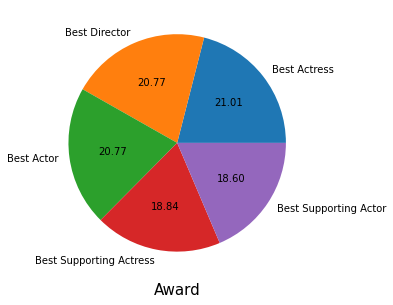

In [29]:
#import seaborn as sns
plt.subplots(figsize = (10,5))
df2['award'].value_counts().plot(kind='pie',autopct='%.2f')
plt.xlabel("Award", size=15)
plt.ylabel(" ", size=15)
plt.show()

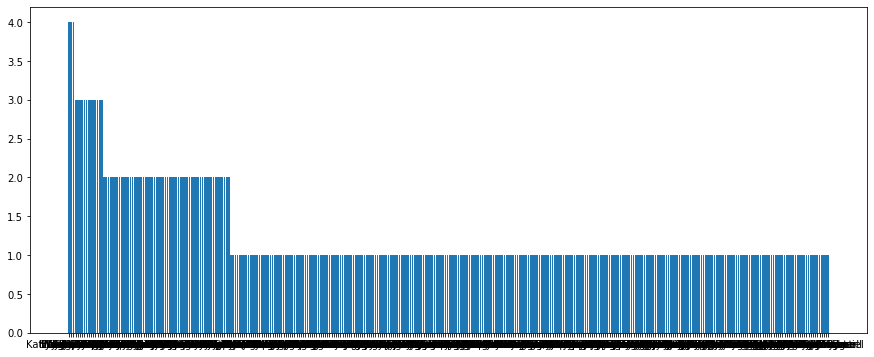

In [30]:
cnt_plt=df.groupby(['person']).size().reset_index(name='awards').sort_values(by='awards', ascending=False)
plt.figure(figsize=(15,6))
plt.bar('person', 'awards',data=cnt_plt)
plt.show()

In [31]:
df2["sexual_orientation"].fillna("Missing", inplace = True)

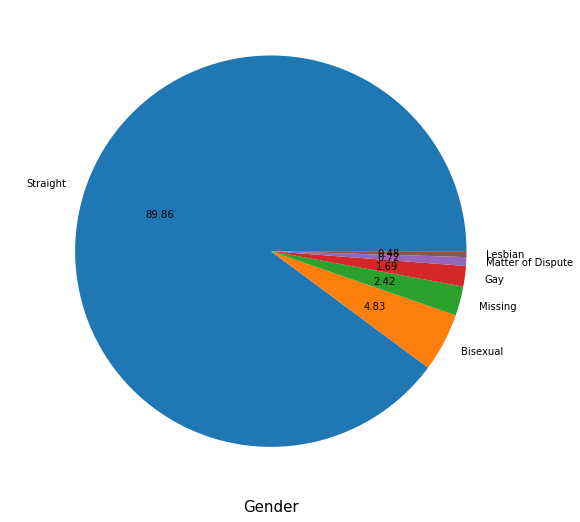

In [32]:
plt.subplots(figsize = (9,9))
df2['sexual_orientation'].value_counts().plot(kind='pie',autopct='%.2f')
plt.xlabel("Gender", size=15)
plt.ylabel(" ", size=15)
plt.show()

In [33]:
df2=df2.dropna()

In [34]:
df2['award'].unique()

array(['Best Director', 'Best Actor', 'Best Supporting Actor',
       'Best Actress', 'Best Supporting Actress'], dtype=object)

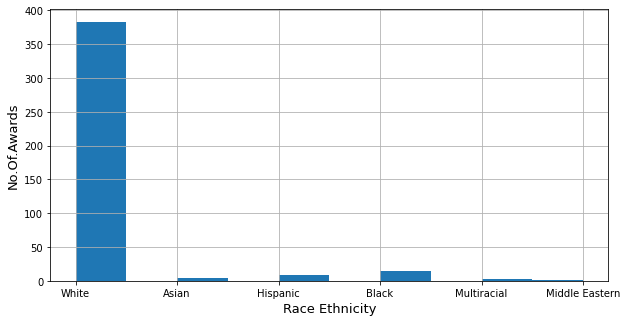

In [35]:
%matplotlib inline
plt.subplots(figsize = (10,5))
ax=df2['race_ethnicity'].hist()
plt.xlabel("Race Ethnicity", size=13)
plt.ylabel("No.Of.Awards", size=13)
plt.savefig("Race_vs_Awards.png")

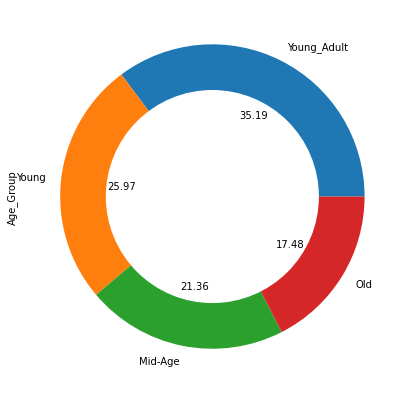

In [36]:
plt.subplots(figsize = (10,7))
#df2['Age_Group'].hist()
df2['Age_Group'].value_counts().plot(kind='pie',autopct='%.2f')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("Age_vs_Awards.png")

In [37]:
age_plt=df2.groupby(['award']).mean().sort_values(by='award_age', ascending=False)
#age_plt.filter(lambda x: x['award']=="Best Director")
age_plt

,award_age
award,
Best Supporting Actor,50.586667
Best Director,47.279070
Best Actor,45.046512
Best Supporting Actress,40.641026
Best Actress,36.850575


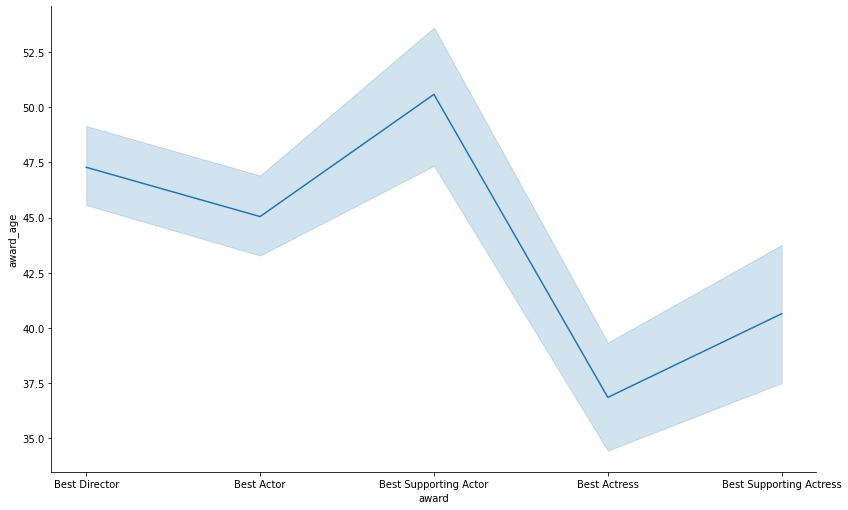

In [38]:
sns.relplot(y='award_age', x='award', kind='line', data=df2,height=7, aspect=10/6);

#### Above plot shows the average age of Director tends older than Best Actor and Best Actress

In [39]:
cnt_list=df2['Country'].unique().tolist()
print(cnt_list)

['Moldova', 'Scotland', 'USA', 'Italy', 'France', 'Hungary', 'Austria', 'Turkey', 'England', 'Germany', 'Japan', 'Czechoslovakia', 'Canada', 'New Zealand', 'Taiwan', 'Switzerland', 'Ukraine', 'Wales', 'Puerto Rico', 'Russia', 'Australia', 'Ireland', 'Mexico', 'Romania', 'Cambodia', 'Canary Islands', 'India', 'Sweden', 'Belgium', 'South Africa', 'Israel', 'Greece', 'Spain']


Due several countries in Country, all are categorized based on the region

In [40]:
df2['Country'] = df2['Country'].replace(['France','Italy','Austria','Germany','Sweden','Ireland','Czechoslovakia','Moldova','Hungary','Ukraine','Belgium','Switzerland','Greece','Spain','Romania'], 'European')
df2['Country'] = df2['Country'].replace(['England','Wales','Scotland'], 'UK')
df2['Country'] = df2['Country'].replace(['Japan','India','Taiwan','Cambodia'], 'Asia')
df2['Country'] = df2['Country'].replace(['South Africa', 'Canary Islands'], 'Africa')
df2['Country'] = df2['Country'].replace(['Turkey','Israel'], 'Middle_East')
df2['Country'] = df2['Country'].replace(['USA','Puerto Rico'], 'USA')
df2['Country'] = df2['Country'].replace(['Canada','Mexico'], 'North_America')

In [41]:
df2

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth,Age_Group
0,White,Best Director,Straight,32,Chisinau,European,"Chisinau, Moldova",Young
1,White,Best Director,Straight,44,Glasgow,UK,"Glasgow, Scotland",Young_Adult
2,White,Best Director,Straight,36,Chisinau,European,"Chisinau, Moldova",Young_Adult
3,White,Best Director,Straight,33,Chicago,USA,"Chicago, USA",Young
4,White,Best Director,Straight,39,Salt Lake City,USA,"Salt Lake City, USA",Young_Adult
5,White,Best Director,Straight,48,Glasgow,UK,"Glasgow, Scotland",Mid-Age
6,White,Best Director,Straight,38,Bisacquino,European,"Bisacquino, Italy",Young_Adult
7,White,Best Director,Bisexual,42,Cape Elizabeth,USA,"Cape Elizabeth, USA",Young_Adult
8,White,Best Director,Straight,40,Bisacquino,European,"Bisacquino, Italy",Young_Adult
9,White,Best Director,Straight,40,Los Angeles,USA,"Los Angeles, USA",Young_Adult


In [42]:
cnt_plt=df2.groupby(['Country']).size().reset_index(name='awards').sort_values(by='awards', ascending=False)
cnt_plt

,Country,awards
9,USA,270
8,UK,63
3,European,43
1,Asia,11
6,North_America,11
2,Australia,4
4,Middle_East,3
7,Russia,3
0,Africa,2
5,New Zealand,2


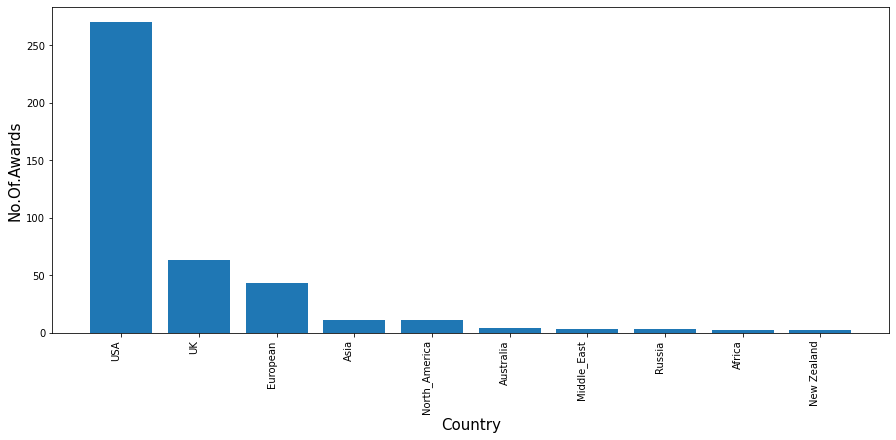

In [43]:
plt.figure(figsize=(15,6))
plt.bar('Country', 'awards',data=cnt_plt)
plt.xlabel("Country", size=15)
plt.ylabel("No.Of.Awards", size=15)
plt.xticks(rotation=90, ha='right')
plt.savefig("Country_vs_Awards.png")

Above plot shows that most of the winners are USA

## Model Building

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

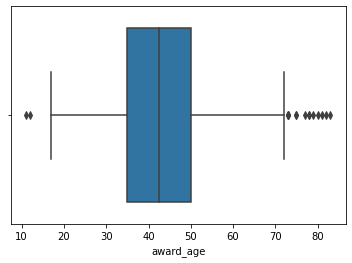

In [45]:
sns.boxplot(data=df2,x=df2['award_age'])
plt.show()

Outliers are identified in age, however they are can be removed by bucketing

In [46]:
X=df2[['race_ethnicity','Country','Age_Group']]
y=df2['award']

In [47]:
# Creating the dummy variables as we have many categorical variables
X=pd.get_dummies(X)

In [48]:
X.head()

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Country_Africa,Country_Asia,Country_Australia,Country_European,Country_Middle_East,Country_New Zealand,Country_North_America,Country_Russia,Country_UK,Country_USA,Age_Group_Young,Age_Group_Young_Adult,Age_Group_Mid-Age,Age_Group_Old
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [49]:
X.shape

(412, 20)

In [50]:
y.shape

(412,)

In [51]:
pd.value_counts(y, normalize = True)

Best Actress               0.211165
Best Director              0.208738
Best Actor                 0.208738
Best Supporting Actress    0.189320
Best Supporting Actor      0.182039
Name: award, dtype: float64

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

##### Testing with Logistic Regression and Decision Tree

In [53]:
# Prediction using the Logistic regression
cv_score = cross_val_score(LogisticRegression(), 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
cv_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.3s finished


array([0.37272727, 0.37272727, 0.42201835])

In [54]:
# Decision Tree for numerical columns

clf = DecisionTreeClassifier()
cv_score = cross_val_score(clf, 
                            X_train, y_train,
                            scoring = 'accuracy',
                            cv = 3,
                            n_jobs = -1,
                            verbose = 1)
cv_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.2s finished


array([0.31818182, 0.33636364, 0.37614679])

#### Random Forest

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
rfclf = RandomForestClassifier(oob_score=True,n_jobs=-1,random_state=42)
rfclf.fit(X_train, y_train)
print(rfclf.score(X_test, y_test))
print(rfclf.oob_score_) #Out-Of-Bag score

0.27710843373493976
0.3556231003039514


In [56]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [57]:
print(rfclf.estimators_[0].feature_importances_)

[0.03266914 0.06738112 0.06960053 0.         0.         0.01633249
 0.         0.         0.0490861  0.10012753 0.04583633 0.
 0.06320563 0.02551607 0.06625565 0.07936283 0.06068728 0.08823427
 0.23570502 0.        ]


In [58]:
imp_features=[]
for i in rfclf.estimators_:
    imp_features.append(i.feature_importances_)
imp_features=np.mean(imp_features,axis=0)

In [59]:
feature_importance=pd.Series(imp_features,index=X.columns.tolist())

In [60]:
feature_importance.sort_values(ascending=False)

Age_Group_Young                  0.201090
Country_USA                      0.089660
Age_Group_Mid-Age                0.088418
Country_European                 0.080521
race_ethnicity_White             0.080429
Age_Group_Young_Adult            0.070819
Age_Group_Old                    0.068364
Country_UK                       0.053508
Country_North_America            0.047788
Country_Australia                0.040481
Country_Asia                     0.036714
race_ethnicity_Black             0.030136
race_ethnicity_Hispanic          0.027030
Country_Middle_East              0.023108
Country_Russia                   0.020114
race_ethnicity_Asian             0.017152
Country_New Zealand              0.011749
Country_Africa                   0.008018
race_ethnicity_Middle Eastern    0.004902
race_ethnicity_Multiracial       0.000000
dtype: float64

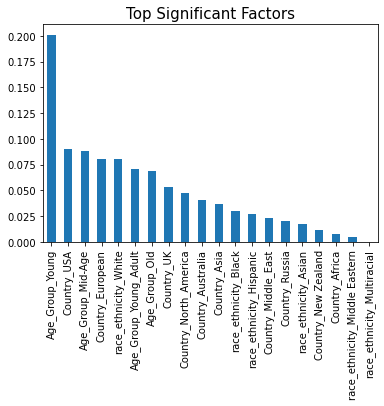

In [61]:
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Top Significant Factors",size=15)
plt.savefig("imp_features.png")

###### Tuning the model

In [62]:
for w in range(10,800,20):
    rfclf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=42)
    rfclf.fit(X_train,y_train)
    oob=rfclf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.364741641337386
************************
For n_estimators = 30
OOB score is 0.364741641337386
************************
For n_estimators = 50
OOB score is 0.3617021276595745
************************
For n_estimators = 70
OOB score is 0.3708206686930091
************************
For n_estimators = 90
OOB score is 0.3556231003039514
************************
For n_estimators = 110
OOB score is 0.3586626139817629
************************
For n_estimators = 130
OOB score is 0.3586626139817629
************************
For n_estimators = 150
OOB score is 0.364741641337386
************************
For n_estimators = 170
OOB score is 0.364741641337386
************************
For n_estimators = 190
OOB score is 0.3617021276595745
************************
For n_estimators = 210
OOB score is 0.3617021276595745
************************
For n_estimators = 230
OOB score is 0.3586626139817629
************************
For n_estimators = 250
OOB score is 0.35258358662

In [63]:
rfclf=RandomForestClassifier(n_estimators=10,oob_score=True,n_jobs=-1,random_state=42)

In [64]:
rfclf.fit(X_train,y_train)
rfclf.oob_score_

0.364741641337386

In [65]:
rfclf.feature_importances_

array([0.0112738 , 0.02880068, 0.0351783 , 0.00424328, 0.        ,
       0.10302574, 0.00427586, 0.04341989, 0.04509028, 0.06265141,
       0.02882665, 0.00838489, 0.04067435, 0.0154057 , 0.04003361,
       0.06819827, 0.20556958, 0.09057338, 0.10922815, 0.0551462 ])

In [66]:
param_grid = {
    'n_estimators': [10,20,30,50,80],
    'max_depth': [6,10,20,30,50,80],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=4, 
                          return_train_score=True, verbose=10)
gridsearch.fit(X_train, y_train)

Fitting 4 folds for each of 270 candidates, totalling 1080 fits
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=(train=0.467, test=0.349), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=(train=0.478, test=0.305), total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=(train=0.445, test=0.329), total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s



[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=10, score=(train=0.433, test=0.366), total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=(train=0.467, test=0.337), total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=(train=0.486, test=0.317), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=(train=0.441, test=0.427), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=20, score=(train=0.453, test=0.366), total=   0.0s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=(train=0.467, test=0.349), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=(train=0.486, test=0.305), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=(train=0.441, test=0.378), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30, score=(train=0.457, test=0.329), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.472, test=0.361), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=(train=0.486, test=0.305), total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 10, 20, 30, 50, 80],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 50, 80]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
rfclf = RandomForestClassifier(max_depth=10,max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=50,oob_score=True,n_jobs=-1,bootstrap = True ,random_state=42)
rfclf.fit(X_train, y_train)
print(rfclf.score(X_test, y_test))
print(rfclf.oob_score_)

0.2891566265060241
0.3951367781155015


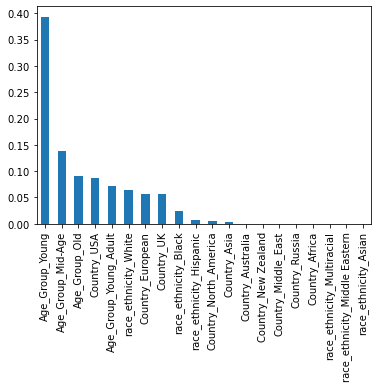

In [68]:
im_feat=pd.Series(rfclf.feature_importances_,index=X.columns.tolist())
im_feat=im_feat.sort_values(ascending=False)
im_feat.plot(kind='bar')
plt.show()

###### Building the model and testing by adding Sexual_orientation columns, Howver it doesn't show any improvement

In [69]:

X1=df2[['race_ethnicity','Country','sexual_orientation','Age_Group']]
y1=df2['award']

In [70]:
X1=pd.get_dummies(X1)

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=42)
rfclf = RandomForestClassifier(max_depth=80,max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=50,oob_score=True,n_jobs=-1,random_state=42)
rfclf.fit(X1_train, y1_train)
print(rfclf.score(X1_test, y1_test))
print(rfclf.oob_score_)

0.27710843373493976
0.3768996960486322


In [72]:
param_grid = {
    'n_estimators': [10, 20, 30,50,80],
    'max_depth': [6, 10, 20, 30,50,80]
}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=3, 
                          return_train_score=True, verbose=10)
gridsearch.fit(X1_train, y1_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] max_depth=6, n_estimators=10 ....................................
[CV]  max_depth=6, n_estimators=10, score=(train=0.530, test=0.291), total=   0.0s
[CV] max_depth=6, n_estimators=10 ....................................
[CV]  max_depth=6, n_estimators=10, score=(train=0.479, test=0.364), total=   0.0s
[CV] max_depth=6, n_estimators=10 ....................................
[CV]  max_depth=6, n_estimators=10, score=(train=0.477, test=0.349), total=   0.0s
[CV] max_depth=6, n_estimators=20 ....................................
[CV]  max_depth=6, n_estimators=20, score=(train=0.534, test=0.318), total=   0.0s
[CV] max_depth=6, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=6, n_estimators=20, score=(train=0.502, test=0.336), total=   0.1s
[CV] max_depth=6, n_estimators=20 ....................................
[CV]  max_depth=6, n_estimators=20, score=(train=0.477, test=0.404), total=   0.1s
[CV] max_depth=6, n_estimators=30 ....................................
[CV]  max_depth=6, n_estimators=30, score=(train=0.525, test=0.336), total=   0.1s
[CV] max_depth=6, n_estimators=30 ....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=6, n_estimators=30, score=(train=0.498, test=0.373), total=   0.1s
[CV] max_depth=6, n_estimators=30 ....................................
[CV]  max_depth=6, n_estimators=30, score=(train=0.505, test=0.349), total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=6, n_estimators=50, score=(train=0.539, test=0.318), total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV]  max_depth=6, n_estimators=50, score=(train=0.507, test=0.364), total=   0.1s
[CV] max_depth=6, n_estimators=50 ....................................
[CV]  max_depth=6, n_estimators=50, score=(train=0.505, test=0.367), total=   0.1s
[CV] max_depth=6, n_estimators=80 ....................................
[CV]  max_depth=6, n_estimators=80, score=(train=0.534, test=0.318), total=   0.1s
[CV] max_depth=6, n_estimators=80 ....................................
[CV]  max_depth=6, n_estimators=80, score=(train=0.502, test=0.318), total=   0.1s
[CV] max_depth=6, n_estimators=80 ....................................
[CV]  max_depth=6, n_estimators=80, score=(train=0.500, test=0.349), total=   0.1s
[CV] max_depth=10, n_estimators=10 ...................................
[CV]  max_depth=10, n_estimators=10, score=(train=0.548, test=0.291), total=

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.3s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 10, 20, 30, 50, 80],
                         'n_estimators': [10, 20, 30, 50, 80]},
             return_train_score=True, scoring='accuracy', verbose=10)

### Clustering with KMeans

In [73]:
# Importing packages for Kmeans and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
df3=df2.copy()
df3.head()

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth,Age_Group
0,White,Best Director,Straight,32,Chisinau,European,"Chisinau, Moldova",Young
1,White,Best Director,Straight,44,Glasgow,UK,"Glasgow, Scotland",Young_Adult
2,White,Best Director,Straight,36,Chisinau,European,"Chisinau, Moldova",Young_Adult
3,White,Best Director,Straight,33,Chicago,USA,"Chicago, USA",Young
4,White,Best Director,Straight,39,Salt Lake City,USA,"Salt Lake City, USA",Young_Adult


In [75]:
# Converting the Categorical variable to Numierical
osc1 = {'White':1, 'Asian':2, 'Hispanic':3, 'Black':4, 'Multiracial':5, 'Middle Eastern':6}
df3.race_ethnicity = df3.race_ethnicity.map(osc1)
df3

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth,Age_Group
0,1,Best Director,Straight,32,Chisinau,European,"Chisinau, Moldova",Young
1,1,Best Director,Straight,44,Glasgow,UK,"Glasgow, Scotland",Young_Adult
2,1,Best Director,Straight,36,Chisinau,European,"Chisinau, Moldova",Young_Adult
3,1,Best Director,Straight,33,Chicago,USA,"Chicago, USA",Young
4,1,Best Director,Straight,39,Salt Lake City,USA,"Salt Lake City, USA",Young_Adult
5,1,Best Director,Straight,48,Glasgow,UK,"Glasgow, Scotland",Mid-Age
6,1,Best Director,Straight,38,Bisacquino,European,"Bisacquino, Italy",Young_Adult
7,1,Best Director,Bisexual,42,Cape Elizabeth,USA,"Cape Elizabeth, USA",Young_Adult
8,1,Best Director,Straight,40,Bisacquino,European,"Bisacquino, Italy",Young_Adult
9,1,Best Director,Straight,40,Los Angeles,USA,"Los Angeles, USA",Young_Adult


In [76]:
osc2={'Best Director':1, 'Best Actor':2, 'Best Supporting Actor':3, 'Best Actress':4, 'Best Supporting Actress':5}
df3.award = df3.award.map(osc2)
df3.head()

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth,Age_Group
0,1,1,Straight,32,Chisinau,European,"Chisinau, Moldova",Young
1,1,1,Straight,44,Glasgow,UK,"Glasgow, Scotland",Young_Adult
2,1,1,Straight,36,Chisinau,European,"Chisinau, Moldova",Young_Adult
3,1,1,Straight,33,Chicago,USA,"Chicago, USA",Young
4,1,1,Straight,39,Salt Lake City,USA,"Salt Lake City, USA",Young_Adult


In [77]:
osc3 = {'Young':1, 'Young_Adult':2, 'Mid-Age':3, 'Old':4}
df3.Age_Group = df3.Age_Group.map(osc3)
df3

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth,Age_Group
0,1,1,Straight,32,Chisinau,European,"Chisinau, Moldova",1
1,1,1,Straight,44,Glasgow,UK,"Glasgow, Scotland",2
2,1,1,Straight,36,Chisinau,European,"Chisinau, Moldova",2
3,1,1,Straight,33,Chicago,USA,"Chicago, USA",1
4,1,1,Straight,39,Salt Lake City,USA,"Salt Lake City, USA",2
5,1,1,Straight,48,Glasgow,UK,"Glasgow, Scotland",3
6,1,1,Straight,38,Bisacquino,European,"Bisacquino, Italy",2
7,1,1,Bisexual,42,Cape Elizabeth,USA,"Cape Elizabeth, USA",2
8,1,1,Straight,40,Bisacquino,European,"Bisacquino, Italy",2
9,1,1,Straight,40,Los Angeles,USA,"Los Angeles, USA",2


In [78]:
osc4 = {'USA':1, 'UK':2, 'European':3, 'Asia':4,'USA':5, 'North_America':6, 'Australia':7, 'Middle_East':8,'Russia':9, 'Africa':10, 'New Zealand':11}
df3.Country = df3.Country.map(osc4)
df3

,race_ethnicity,award,sexual_orientation,award_age,City,Country,place_of_birth,Age_Group
0,1,1,Straight,32,Chisinau,3,"Chisinau, Moldova",1
1,1,1,Straight,44,Glasgow,2,"Glasgow, Scotland",2
2,1,1,Straight,36,Chisinau,3,"Chisinau, Moldova",2
3,1,1,Straight,33,Chicago,5,"Chicago, USA",1
4,1,1,Straight,39,Salt Lake City,5,"Salt Lake City, USA",2
5,1,1,Straight,48,Glasgow,2,"Glasgow, Scotland",3
6,1,1,Straight,38,Bisacquino,3,"Bisacquino, Italy",2
7,1,1,Bisexual,42,Cape Elizabeth,5,"Cape Elizabeth, USA",2
8,1,1,Straight,40,Bisacquino,3,"Bisacquino, Italy",2
9,1,1,Straight,40,Los Angeles,5,"Los Angeles, USA",2


In [79]:
cols_of_interest = ['race_ethnicity', 'award', 'Age_Group','Country']

In [80]:
df4=df3[cols_of_interest]

df4.head()

,race_ethnicity,award,Age_Group,Country
0,1,1,1,3
1,1,1,2,2
2,1,1,2,3
3,1,1,1,5
4,1,1,2,5


In [81]:
temp4 = pd.DataFrame(df4.isnull().sum()[df4.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])
temp4['percentage']=temp4['Total_missing']/df4.shape[0]
print(temp4)

Empty DataFrame
Columns: [Total_missing, percentage]
Index: []


In [82]:
index1=df4.columns.tolist()
print(index1)

['race_ethnicity', 'award', 'Age_Group', 'Country']


In [83]:
#Unique Values for each Column
for x in index1:
    print('  ')
    print('Column Name : '+x)
    y=str(len(df4[x].unique().tolist()))
    print('-------------------------------------')
    print('Unique Values : '+y)
    print('  ')
    print(df4[x].unique().tolist())
    print('  ')
    print('-------------------------------------')

  
Column Name : race_ethnicity
-------------------------------------
Unique Values : 6
  
[1, 2, 3, 4, 5, 6]
  
-------------------------------------
  
Column Name : award
-------------------------------------
Unique Values : 5
  
[1, 2, 3, 4, 5]
  
-------------------------------------
  
Column Name : Age_Group
-------------------------------------
Unique Values : 4
  
[1, 2, 3, 4]
  
-------------------------------------
  
Column Name : Country
-------------------------------------
Unique Values : 10
  
[3, 2, 5, 8, 4, 6, 11, 9, 7, 10]
  
-------------------------------------


In [84]:
df4.Age_Group = df4.Age_Group.astype('int64')

In [85]:
X = StandardScaler().fit_transform(df4)

In [86]:
## normalisation
df_norm = (df4 - df4.min()) / (df4.max() - df4.min())
df_norm.head()

,race_ethnicity,award,Age_Group,Country
0,0.0,0.0,0.000000,0.111111
1,0.0,0.0,0.333333,0.000000
2,0.0,0.0,0.333333,0.111111
3,0.0,0.0,0.000000,0.333333
4,0.0,0.0,0.333333,0.333333


In [87]:
## call KMeans algo with 6 clusters
model = KMeans(n_clusters=6)
model.fit(df_norm)
## J score
print('Cost = ', model.inertia_)
## include the labels into the data
print(model.labels_)

Cost =  30.97399594525797
[3 3 3 3 3 0 3 3 3 3 3 0 0 0 3 0 0 3 3 3 3 3 3 3 0 0 0 0 3 0 0 0 0 0 0 0 3
 0 0 0 3 0 0 3 0 3 0 0 3 3 3 3 3 0 3 3 0 3 0 0 3 0 0 3 0 0 0 3 3 3 3 0 3 3
 0 0 3 0 0 0 0 0 0 3 3 0 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 0 3 3 0 0 3 3 5 0 0
 3 3 3 3 3 0 3 0 3 0 5 0 3 3 3 0 0 3 3 0 0 0 3 0 3 3 3 3 0 5 0 5 3 0 3 0 3
 3 0 0 3 3 3 0 0 0 3 3 5 3 3 5 3 5 0 0 0 0 3 0 3 3 3 3 0 0 2 1 2 2 3 1 2 2
 0 3 3 5 3 3 1 5 3 0 0 3 1 2 2 3 0 0 3 2 2 2 0 3 2 1 2 0 2 3 2 1 2 5 3 2 0
 2 3 5 0 2 2 0 2 3 5 0 2 2 5 0 0 0 2 3 2 5 1 3 2 3 1 4 1 2 1 1 1 1 1 1 1 1
 1 1 4 1 1 4 1 1 1 1 1 4 4 1 1 4 4 1 4 4 1 1 1 4 1 1 1 2 1 2 4 1 1 1 4 4 4
 4 1 4 1 1 2 1 4 4 2 1 4 1 2 4 1 1 4 4 4 4 1 1 1 1 5 4 1 1 1 2 1 1 4 1 2 1
 4 4 4 4 5 2 4 1 4 2 4 1 1 4 1 2 1 1 1 1 4 1 1 4 4 1 1 1 2 4 4 1 4 2 1 2 4
 4 1 2 4 2 4 4 1 1 2 1 4 2 1 4 2 1 4 5 4 1 1 4 1 1 4 2 1 4 1 1 1 4 1 5 4 1
 5 4 5 1 5]


In [88]:
## cluster centers 
centroids = model.cluster_centers_
print ('centroids', centroids)

centroids [[ 4.30107527e-03  1.74731183e-01  7.63440860e-01  2.43727599e-01]
 [ 1.11111111e-02  8.19444444e-01 -5.55111512e-16  2.90123457e-01]
 [ 1.33333333e-02  6.77777778e-01  1.00000000e+00  2.44444444e-01]
 [ 1.85185185e-03  1.99074074e-01  2.93209877e-01  2.71604938e-01]
 [ 7.27272727e-03  8.77272727e-01  4.36363636e-01  2.86868687e-01]
 [ 5.90476190e-01  5.71428571e-01  3.49206349e-01  3.59788360e-01]]



Plotting elbow method...
2 70.82816010656899
4 39.32840571238064
6 30.665750475014327
8 25.760709900063244
10 21.235166581313997
12 18.387260925904894
14 16.28892756199434
16 13.834958745159337
18 11.88867268482781


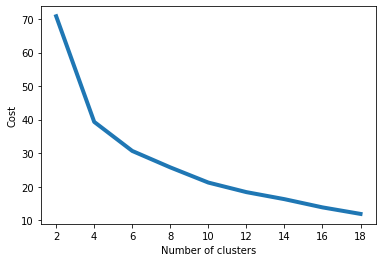

In [89]:
def elbow(data):
    print("\nPlotting elbow method...")
    sse = {}
    for i in range(2, 20, 2):
        kmeans = KMeans(n_clusters=i, max_iter=1000).fit(data)
        print(i, kmeans.inertia_)
        sse[i] = kmeans.inertia_  
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Cost")
    plt.show()
elbow(df_norm)

[[1.04       3.98       2.34       2.36      ]
 [1.07142857 1.44642857 2.57142857 2.44642857]
 [1.29365079 4.15079365 1.4047619  5.03968254]
 [1.2        2.6        2.         9.3       ]
 [1.15254237 3.76271186 3.52542373 5.05084746]
 [1.18918919 1.53153153 2.54954955 5.        ]]


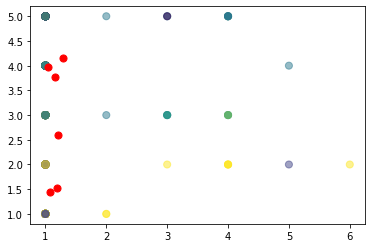

In [90]:
kmeans = KMeans(n_clusters=6).fit(df4)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df4['race_ethnicity'], df4['award'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()